In [2]:
und2x2 = readcfl('/tmp/espirit-matlab-examples/data/und2x2');
ksp_rss = bart('rss 8', und2x2);

In [3]:
% zero-filled reconstruction sqrt-sum-of-squares
zf_coils = bart('fft -i 6', und2x2);
zf_rss = bart('rss 8', zf_coils);

ksp_rss = squeeze(ksp_rss);
zf_coils = squeeze(zf_coils);
zf_rss = squeeze(zf_rss);

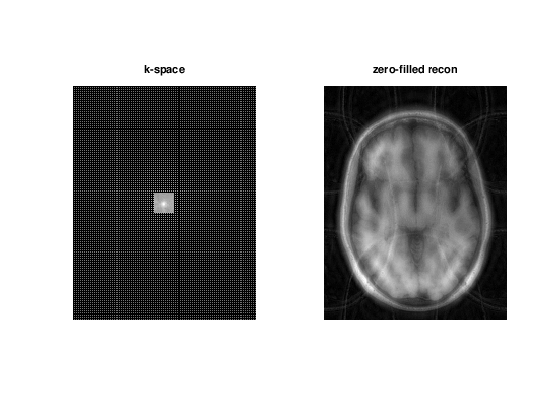

In [4]:
figure,subplot(1,2,1), imshow(abs(ksp_rss).^0.125, []); title('k-space')
subplot(1,2,2), imshow(abs(zf_rss), []); title('zero-filled recon')

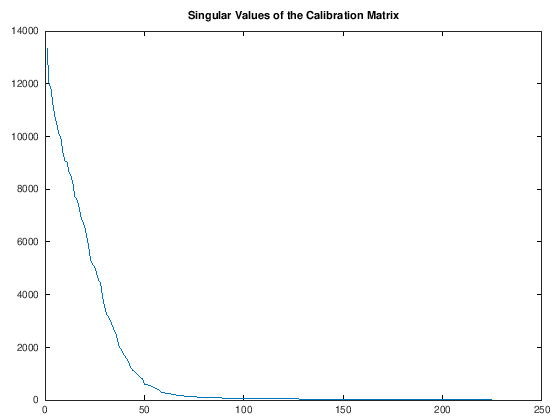

In [5]:
calmat = bart('calmat -r 20 -k 6', und2x2);
[U SV VH] = bart('svd', calmat);

figure, plot(SV);
title('Singular Values of the Calibration Matrix');

In [6]:
[calib emaps] = bart('ecalib -r 20', und2x2);


Done.


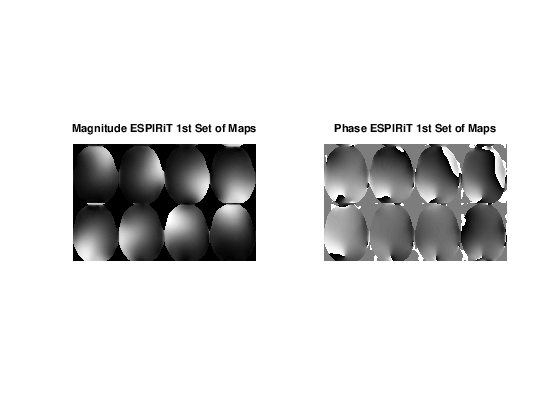

In [7]:
sens = bart('slice 4 0', calib);


sens_maps = squeeze(sens);

figure,
subplot(121), imshow3(abs(sens_maps), [],[2,4]);
title('Magnitude ESPIRiT 1st Set of Maps')
subplot(122), imshow3(angle(sens_maps),[],[2,4])
title('Phase ESPIRiT 1st Set of Maps')

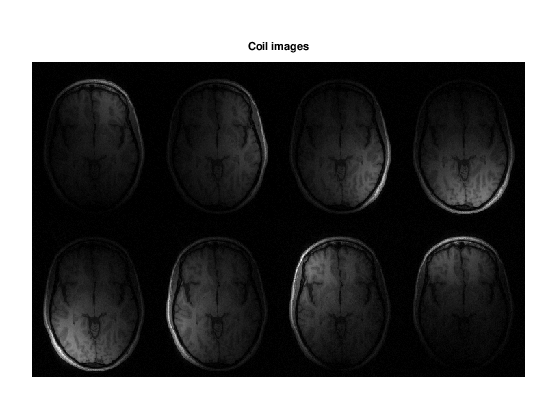

In [9]:
full = readcfl('/tmp/espirit-matlab-examples/data/full');
coilimgs = bart('fft -i 6', full);

coil_imgs = squeeze(coilimgs);
figure, imshow3(abs(coil_imgs), [],[2,4])
title('Coil images')

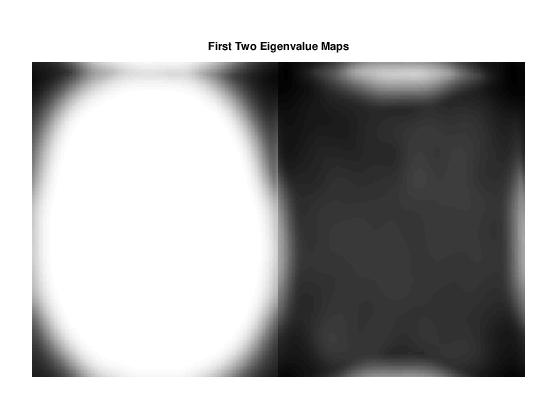

In [10]:
emaps = squeeze(emaps);
figure, imshow3(emaps, [], [1, 2]);
title('First Two Eigenvalue Maps')

Size: 41400 Samples: 10650 Acc: 3.89
conjugate gradients
Total Time: 14.687818


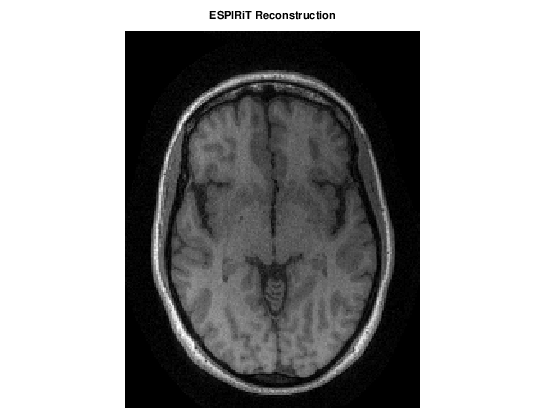

In [11]:
reco = bart('pics', und2x2, sens);

sense_recon = squeeze(reco);
figure, imshow(abs(sense_recon), []); title('ESPIRiT Reconstruction')


Reconstruction...
Done
Done.
Calibration region 1x20x20
Done.
Reconstruction...
Done
Done.


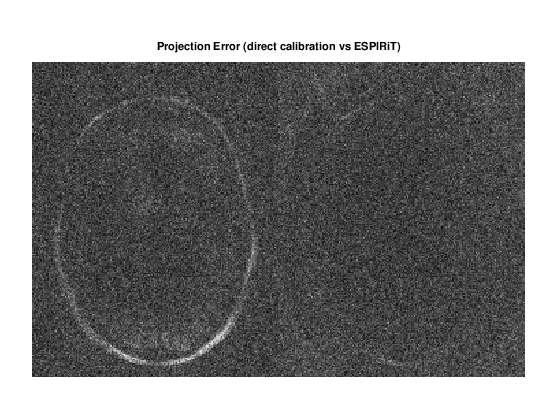

In [12]:
%
% Computing error from projecting fully sampled error
% onto the sensitivities. This can be done with one
% iteration of POCSENSE.
%
proj = bart('pocsense -r 0. -i 1', full, sens);

% Compute error and transform it into image domain and combine into a single map.
errimgs = bart('fft -i 6', (full - proj));
errsos_espirit = bart('rss 8', errimgs);

%
% For comparison: compute sensitivities directly from the center.
sens_direct = bart('caldir 20', und2x2);

% Compute error map.
proj = bart('pocsense -r 0. -i 1', full, sens_direct);
errimgs = bart('fft -i 6', (full - proj));
errsos_direct = bart('rss 8', errimgs);


errsos_espirit = squeeze(errsos_espirit);
errsos_direct = squeeze(errsos_direct);

figure,
imshow(abs([errsos_direct errsos_espirit]), []); title('Projection Error (direct calibration vs ESPIRiT)');
